In [4]:
# pip install wget

##### Import necessary libraries

In [5]:
import wget  # For downloading the dataset
import pandas as pd  # For handling and manipulating data
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.linear_model import LinearRegression  # The Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model

#### Step 1: Download the dataset
##### Using wget to fetch a sample dataset from an online source

In [6]:
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"
dataset_path = "dataset.csv"
wget.download(url, dataset_path)

'dataset.csv'

### Step 2: Load the dataset into a pandas DataFrame

In [7]:
# A DataFrame is like a table and is useful for handling datasets
data = pd.read_csv(dataset_path)

# View the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Index   Height(Inches)"   "Weight(Pounds)"
0      1             65.78             112.99
1      2             71.52             136.49
2      3             69.40             153.03
3      4             68.22             142.34
4      5             67.79             144.30


### Step 3: Data preprocessing

In [8]:
# Checking for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Rename columns for easier access if necessary (depends on dataset structure)
# Example: Rename height and weight columns to X and y
data.columns = ['Index', 'Height', 'Weight']  # Renaming for clarity
print("\nRenamed columns:")
print(data.columns)


Checking for missing values:
Index                0
 Height(Inches)"     0
 "Weight(Pounds)"    0
dtype: int64

Renamed columns:
Index(['Index', 'Height', 'Weight'], dtype='object')


### Step 4: Define features (X) and target (y)

In [9]:
# X: independent variables (features)
# y: dependent variable (target we want to predict)
X = data[['Height']]  # Independent variable
y = data['Weight']    # Dependent variable

### Step 5: Split the dataset into training and testing sets

In [10]:
# Training set: used to train the model
# Testing set: used to evaluate the model's performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Create the Linear Regression model

In [11]:
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

### Step 7: Make predictions

In [12]:
# Using the testing set to evaluate the model
y_pred = model.predict(X_test)

### Step 8: Evaluate the model

In [13]:
# Mean Squared Error (MSE): Measures average error squared
mse = mean_squared_error(y_test, y_pred)

# R^2 score: Measures how well the model explains the variance in the data
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 134.94311638223607
R^2 Score: 0.15370545335133745


### Step 9: Visualize the results (optional)

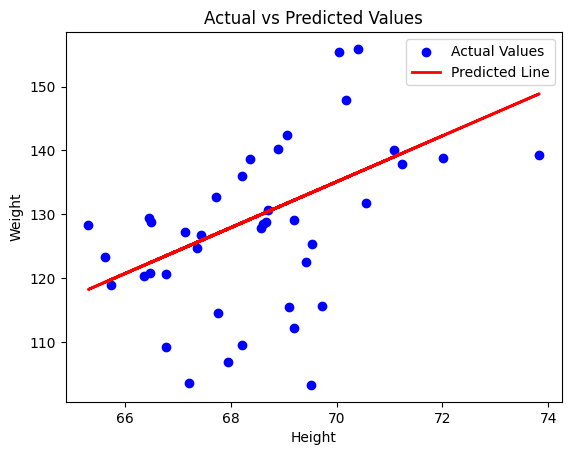

In [14]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Actual vs Predicted Values')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [15]:
# Save the trained model (optional)
import joblib
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'.")


Model saved as 'linear_regression_model.pkl'.
